In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from neural_network_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%reload_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_X, train_Y, test_X, test_Y = load_data('Data/train_test_data.h5')

Keys : [u'test_X', u'test_Y', u'test_mean', u'train_X', u'train_Y', u'train_mean']
train_X is a (25000, 160, 160, 3) array and has 25000 examples
train_Y is a (25000, 1) array and has 25000 examples
test_X is a (12500, 160, 160, 3) array and has 12500 examples
test_Y is a (12500, 1) array and has 12500 examples


y = [0]


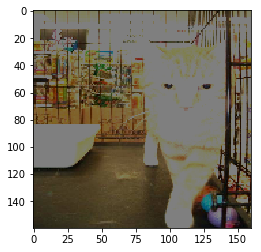

In [3]:
# Example of a picture
index = 1256
plt.imshow(train_X[index])
print('y = {}' .format(train_Y[index]))

In [117]:
# Reshaping the training and test examples
train_X_flatten = train_X.reshape(train_X.shape[0], -1).T     # -1 makes reshape flatten the other dimensions
test_X_flatten = test_X.reshape(test_X.shape[0], -1).T

# Standardizing the features to lie between 0 and 1
train_X = train_X_flatten/255.
test_X = test_X_flatten/255.

print("train_X's shape now : " + str(train_X.shape))
print("test_X's shape now : " + str(test_X.shape))

train_X's shape now : (76800, 25000)
test_X's shape now : (76800, 12500)
